## 데이터 불러오기

In [1]:
import pandas as pd

In [2]:
# CSV 불러오기
df = pd.read_csv('./csv/creditcard.csv')
# 상위 5개 행
print(df.head())

   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28 

## 데이터 기본 정보 확인

In [3]:
# 데이터프레임 정보 확인
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [4]:
# 결측치 확인
print(df.isnull().sum())

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64


## 클래스 불균형 확인

In [5]:
# 라벨 분포 확인
print(df['Class'].value_counts())

Class
0    284315
1       492
Name: count, dtype: int64


In [6]:
# 비율 확인
fraud_ratio = df['Class'].value_counts(normalize=True)
print(fraud_ratio)

Class
0    0.998273
1    0.001727
Name: proportion, dtype: float64


In [7]:
import matplotlib.pyplot as plt

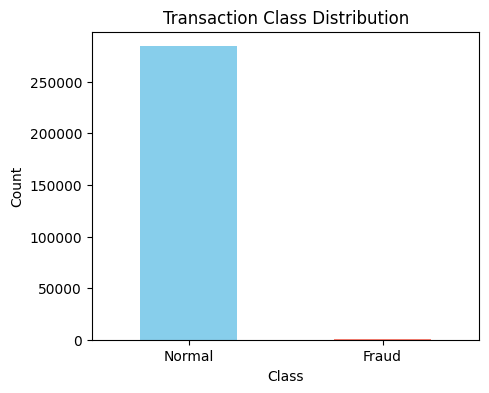

In [8]:
# 비율 시각화
plt.figure(figsize=(5,4))
df['Class'].value_counts().plot(kind='bar', color=['skyblue', 'salmon'])
plt.xticks([0,1], ['Normal', 'Fraud'], rotation=0)
plt.title('Transaction Class Distribution')
plt.ylabel('Count')
plt.show()

## 거래 금액과 시간 분포

In [9]:
import seaborn as sns

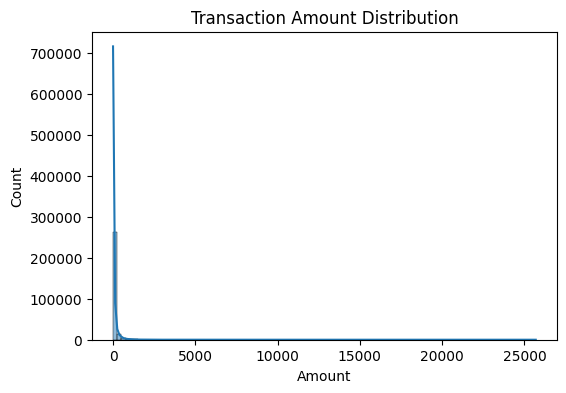

In [10]:
# 거래 금액 분포
plt.figure(figsize=(6,4))
sns.histplot(df['Amount'], bins=100, kde=True)
plt.title('Transaction Amount Distribution')
plt.show()

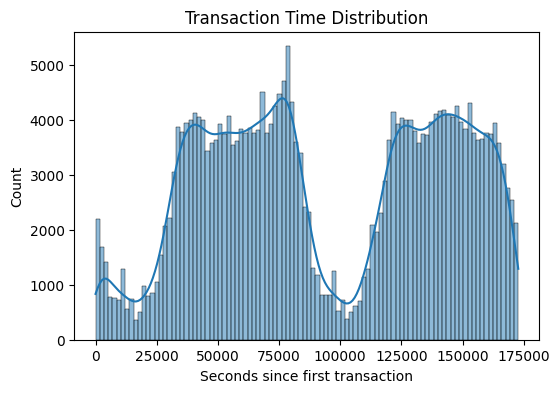

In [11]:
# 시간 분포
plt.figure(figsize=(6,4))
sns.histplot(df['Time'], bins=100, kde=True)
plt.title('Transaction Time Distribution')
plt.xlabel('Seconds since first transaction')
plt.show()

## 사기 거래와 정상 거래의 특성 비교

In [12]:
# 사기 거래와 정상 거래 나누기
fraud = df[df['Class'] == 1]
normal = df[df['Class'] == 0]

In [13]:
# 금액 비교
print("평균 금액 (정상):", normal['Amount'].mean())
print("평균 금액 (사기):", fraud['Amount'].mean())

평균 금액 (정상): 88.29102242231328
평균 금액 (사기): 122.21132113821139


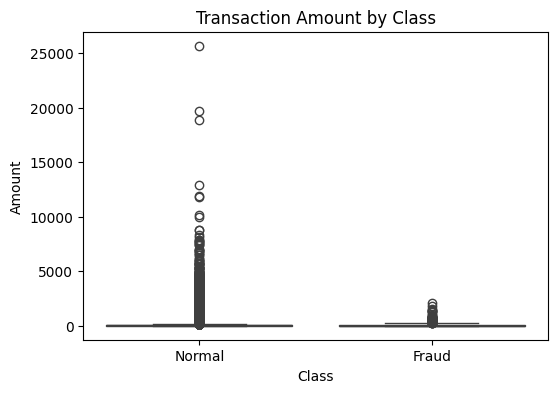

In [14]:
# 금액 비교 시각화
plt.figure(figsize=(6,4))
sns.boxplot(x='Class', y='Amount', data=df)
plt.title('Transaction Amount by Class')
plt.xticks([0,1], ['Normal', 'Fraud'])
plt.show()

## PCA 특성들 간 상관관계 분석

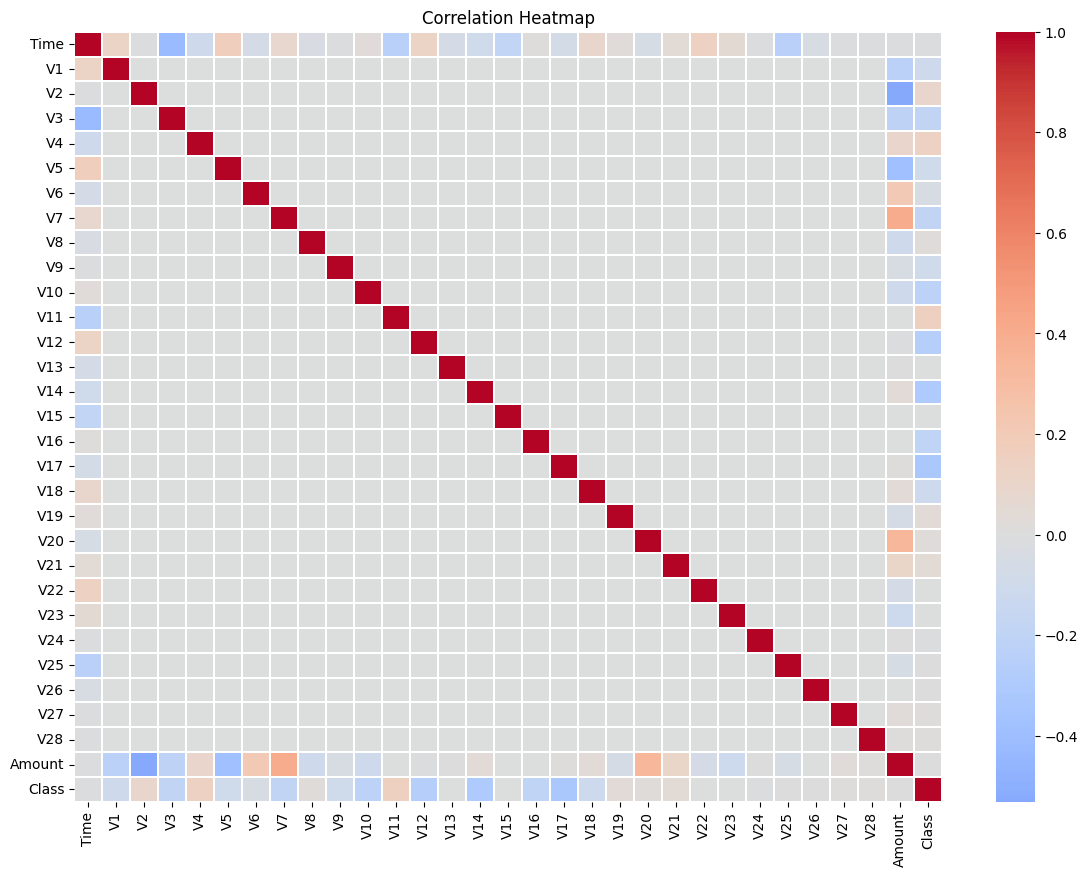

In [15]:
# 상관 관계 히트맵
corr = df.corr()
plt.figure(figsize=(14,10))
sns.heatmap(corr, cmap='coolwarm', center=0, linewidths=0.1)
plt.title('Correlation Heatmap')
plt.show()

## Time, Amount 정규화

In [16]:
from sklearn.preprocessing import StandardScaler

# 정규화할 새로운 열 생성
df['scaled_amount'] = StandardScaler().fit_transform(df[['Amount']])
df['scaled_time'] = StandardScaler().fit_transform(df[['Time']])

# 원래 열 제거
df.drop(['Amount', 'Time'], axis=1, inplace=True)

## 데이터 분리 (입력/정답 + Train/Test)

In [17]:
from sklearn.model_selection import train_test_split

X = df.drop('Class', axis=1)
y = df['Class']

# 시계열 보존을 고려하지 않는 일반적인 분리 (Stratify 옵션으로 클래스 비율 유지)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f"Train 사기 비율: {y_train.mean():.5f}")
print(f"Test 사기 비율: {y_test.mean():.5f}")

Train 사기 비율: 0.00173
Test 사기 비율: 0.00172


## 언더샘플링

In [18]:
# 정상 거래 중 일부 샘플링
normal_train = X_train[y_train == 0]
fraud_train = X_train[y_train == 1]

normal_train_sampled = normal_train.sample(n=len(fraud_train), random_state=42)
X_under = pd.concat([normal_train_sampled, fraud_train])
y_under = pd.Series([0]*len(fraud_train) + [1]*len(fraud_train))

# 셔플
from sklearn.utils import shuffle
X_under, y_under = shuffle(X_under, y_under, random_state=42)

print(f"언더샘플링 후 클래스 비율: {y_under.value_counts(normalize=True)}")

언더샘플링 후 클래스 비율: 1    0.5
0    0.5
Name: proportion, dtype: float64


## 오버샘플링 (SMOTE)

In [19]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_over, y_over = smote.fit_resample(X_train, y_train)

print(f"SMOTE 적용 후 클래스 비율: {y_over.value_counts(normalize=True)}")

SMOTE 적용 후 클래스 비율: Class
0    0.5
1    0.5
Name: proportion, dtype: float64


## 로지스틱 회귀 모델 준비

In [20]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score


def evaluate_model(X_train, y_train, X_test, y_test, label=""):
    model = LogisticRegression(max_iter=1000, random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1]

    print(f"\n[{label}] 성능 평가 결과")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred, digits=4))
    print("ROC AUC Score:", roc_auc_score(y_test, y_prob))

## 언더샘플링 → 모델 학습 및 평가

In [21]:
evaluate_model(X_under, y_under, X_test, y_test, label="언더샘플링")


[언더샘플링] 성능 평가 결과
[[54613  2251]
 [    8    90]]
              precision    recall  f1-score   support

           0     0.9999    0.9604    0.9797     56864
           1     0.0384    0.9184    0.0738        98

    accuracy                         0.9603     56962
   macro avg     0.5191    0.9394    0.5268     56962
weighted avg     0.9982    0.9603    0.9782     56962

ROC AUC Score: 0.9759546228451987


## SMOTE 오버샘플링 → 모델 학습 및 평가

In [22]:
evaluate_model(X_over, y_over, X_test, y_test, label="SMOTE 오버샘플링")


[SMOTE 오버샘플링] 성능 평가 결과
[[55406  1458]
 [    8    90]]
              precision    recall  f1-score   support

           0     0.9999    0.9744    0.9869     56864
           1     0.0581    0.9184    0.1094        98

    accuracy                         0.9743     56962
   macro avg     0.5290    0.9464    0.5481     56962
weighted avg     0.9982    0.9743    0.9854     56962

ROC AUC Score: 0.9698482164390798


### 📊 언더샘플링 vs SMOTE 오버샘플링 성능 비교

| 항목                         | 언더샘플링         | SMOTE 오버샘플링     |
|------------------------------|--------------------|----------------------|
| **Precision (사기 거래)**     | 0.0834             | **0.1094**          |
| **Recall (사기 거래)**        | **0.9184**        | **0.9184**          |
| **F1-score (사기 거래)**      | 0.0738             | **0.1940**         |
| **Accuracy**                 | 0.9603             | **0.9743**          |
| **ROC AUC Score**           | **0.9759**        | 0.9698               |
| **총 테스트 샘플 수**         | 56,962             | 56,962               |

---

###  요약

- **Recall**은 두 방식 모두 매우 우수하여 대부분의 사기 거래를 잘 잡아냄.
- **SMOTE**는 Precision과 F1-score에서 더 뛰어나 **예측 균형이 좋음**.
- **언더샘플링**은 간단하지만 오탐(FP)이 많을 수 있어 실무 활용에 주의 필요.


## 공통 평가 함수

In [23]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from xgboost import XGBClassifier


def evaluate_xgboost(X_train, y_train, X_test, y_test, label=""):
    model = XGBClassifier(
        n_estimators=100,
        max_depth=4,
        eval_metric='logloss',
        random_state=42
    )
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1]

    print(f"\n[XGBoost - {label}] 성능 평가 결과")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred, digits=4))
    print("ROC AUC Score:", roc_auc_score(y_test, y_prob))

## XGBoost - 언더샘플링 평가

In [24]:
evaluate_xgboost(X_under, y_under, X_test, y_test, label="언더샘플링")


[XGBoost - 언더샘플링] 성능 평가 결과
[[54432  2432]
 [    8    90]]
              precision    recall  f1-score   support

           0     0.9999    0.9572    0.9781     56864
           1     0.0357    0.9184    0.0687        98

    accuracy                         0.9572     56962
   macro avg     0.5178    0.9378    0.5234     56962
weighted avg     0.9982    0.9572    0.9765     56962

ROC AUC Score: 0.9742044749807632


## XGBoost - SMOTE 오버샘플링 평가

In [25]:
evaluate_xgboost(X_over, y_over, X_test, y_test, label="SMOTE 오버샘플링")


[XGBoost - SMOTE 오버샘플링] 성능 평가 결과
[[56748   116]
 [   13    85]]
              precision    recall  f1-score   support

           0     0.9998    0.9980    0.9989     56864
           1     0.4229    0.8673    0.5686        98

    accuracy                         0.9977     56962
   macro avg     0.7113    0.9327    0.7837     56962
weighted avg     0.9988    0.9977    0.9981     56962

ROC AUC Score: 0.980199983060191


### 📊 XGBoost: 언더샘플링 vs SMOTE 오버샘플링 성능 비교

| 항목                         | 언더샘플링         | SMOTE 오버샘플링     |
|------------------------------|--------------------|----------------------|
| **Precision (사기 거래)**     | 0.0357             | **0.4229**          |
| **Recall (사기 거래)**        | 0.9184             | **0.8673**           |
| **F1-score (사기 거래)**      | 0.0687             | **0.5686**          |
| **Accuracy**                 | 0.9572             | **0.9977**          |
| **ROC AUC Score**           | 0.9742             | **0.9801**          |
| **총 테스트 샘플 수**         | 56,962             | 56,962               |

---

###  해석 요약

- **SMOTE 오버샘플링 + XGBoost** 조합이 Precision, F1-score, AUC 모두에서 매우 우수함.


## Random Forest 모델 평가 함수

In [26]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score


def evaluate_rf(X_train, y_train, X_test, y_test, label=""):
    model = RandomForestClassifier(
        n_estimators=100,
        max_depth=10,
        random_state=42
    )
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1]

    print(f"\n[Random Forest - {label}] 성능 평가 결과")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred, digits=4))
    print("ROC AUC Score:", roc_auc_score(y_test, y_prob))

## SMOTE + Random Forest 적용 및 평가

In [27]:
evaluate_rf(X_over, y_over, X_test, y_test, label="SMOTE 오버샘플링")


[Random Forest - SMOTE 오버샘플링] 성능 평가 결과
[[56749   115]
 [   15    83]]
              precision    recall  f1-score   support

           0     0.9997    0.9980    0.9989     56864
           1     0.4192    0.8469    0.5608        98

    accuracy                         0.9977     56962
   macro avg     0.7095    0.9225    0.7798     56962
weighted avg     0.9987    0.9977    0.9981     56962

ROC AUC Score: 0.9799987331032582


### 📊 SMOTE + 모델별 성능 비교표

| 모델               | Precision (사기) | Recall (사기) | F1-score (사기) | Accuracy | AUC Score |
|--------------------|------------------|----------------|------------------|-----------|------------|
| **LogisticRegression** | 0.1094           | 0.9184         | 0.1940           | 0.9743    | 0.9698     |
| **XGBoost**            | **0.4229**      | 0.8673         | **0.5686**      | **0.9977**  | **0.9801**  |
| **Random Forest**      | 0.4192           | **0.8469**     | 0.5608           | **0.9977**  | 0.9799     |

---

###  해석 요약

- **Precision / F1-score / AUC** 기준으로는 **XGBoost + SMOTE** 조합이 가장 우수함.
- **Random Forest + SMOTE**도 거의 유사한 성능을 보여줌.
- **Logistic Regression**은 해석 가능성은 높지만, 성능면에서는 뒤처짐.
- 두 트리 기반 모델은 실제 **사기 거래 탐지율(Recall)**을 유지하면서 **오탐을 크게 줄임**.

---

###  결론

- **XGBoost + SMOTE**: 실무 적용, 성능 최적화 모두 만족하는 전략
- **RandomForest + SMOTE**: 해석 가능한 트리 기반 모델을 선호할 경우 대안
- **Logistic Regression**: 기준선(Baseline) 모델 또는 단순 예측용